In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin1')

In [3]:
print(df.columns.tolist())

['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']


In [4]:
print(df.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [5]:
df.columns = df.columns.str.strip()  
print(df.columns.tolist())

['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']


In [6]:
print("Columns in the dataset:")
print(df.columns.tolist())

Columns in the dataset:
['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']


In [7]:
print("\nSample rows:")
print(df.head())


Sample rows:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant 

In [8]:
df.dropna(inplace=True)
print("After dropping NA:", df.shape)

After dropping NA: (5659, 10)


In [9]:
print([col.lower().strip() for col in df.columns])

['name', 'year', 'duration', 'genre', 'rating', 'votes', 'director', 'actor 1', 'actor 2', 'actor 3']


In [10]:
df = df[['Director', 'Actor 1', 'Genre', 'Year', 'Rating']]

In [11]:
df = df[['Director', 'Actor 1', 'Genre', 'Year', 'Rating']].copy()  
df.dropna(inplace=True)

In [12]:
df['Year'] = df['Year'].str.extract(r'(\d{4})')  
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df.dropna(subset=['Year'], inplace=True)
df['Year'] = df['Year'].astype(int)

In [13]:
df['main_genre'] = df['Genre'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else x)

In [14]:
df['rating_class'] = df['Rating'].apply(lambda x: round(x))

In [15]:
X = df[['Director', 'Actor 1', 'main_genre', 'Year']]
y = df['Rating']
rating_class = df['rating_class']

In [16]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [17]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_encoded, rating_class)

In [18]:
y_final = y.loc[X_resampled.index]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_final, test_size=0.2, random_state=42)

In [20]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
y_pred = model.predict(X_test)

In [22]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

MAE: 3.641749999999999
RMSE: 4.483324798628805
R2: -0.5561195142013853


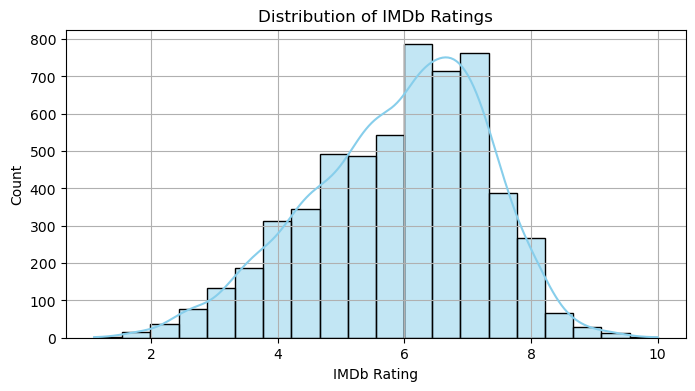

In [23]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Count")
plt.grid(True)
plt.show()

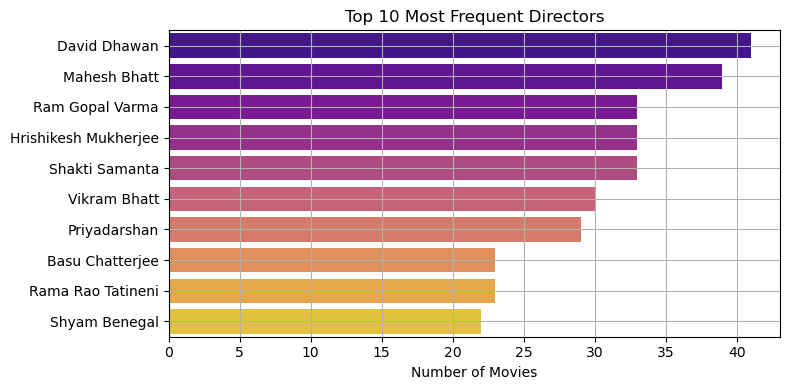

In [24]:
top_directors = df['Director'].value_counts().nlargest(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='plasma')
plt.title("Top 10 Most Frequent Directors")
plt.xlabel("Number of Movies")
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
importances = model.feature_importances_
features = X_train.columns

In [30]:
indices = np.argsort(importances)[-10:] 

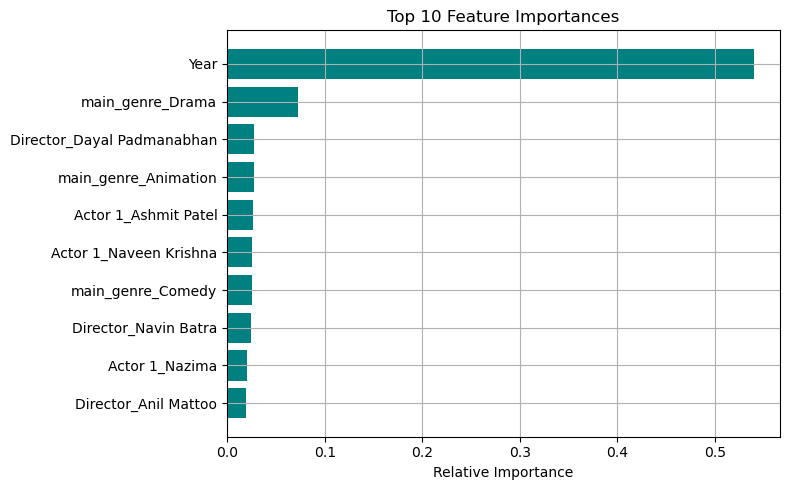

In [31]:
plt.figure(figsize=(8, 5))
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title("Top 10 Feature Importances")
plt.xlabel("Relative Importance")
plt.grid(True)
plt.tight_layout()
plt.show()
